<a href="https://colab.research.google.com/github/KandamuruAdityamanoj/AI-ML-Internship-by-Tech-Mythree/blob/main/Task_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/AI-ML Internship/Task 9/Real estate.csv")

In [ ]:
# Display the first few rows of the dataset
print(data.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [ ]:
# Check for missing values
print(data.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [ ]:
# Summary statistics
print(data.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

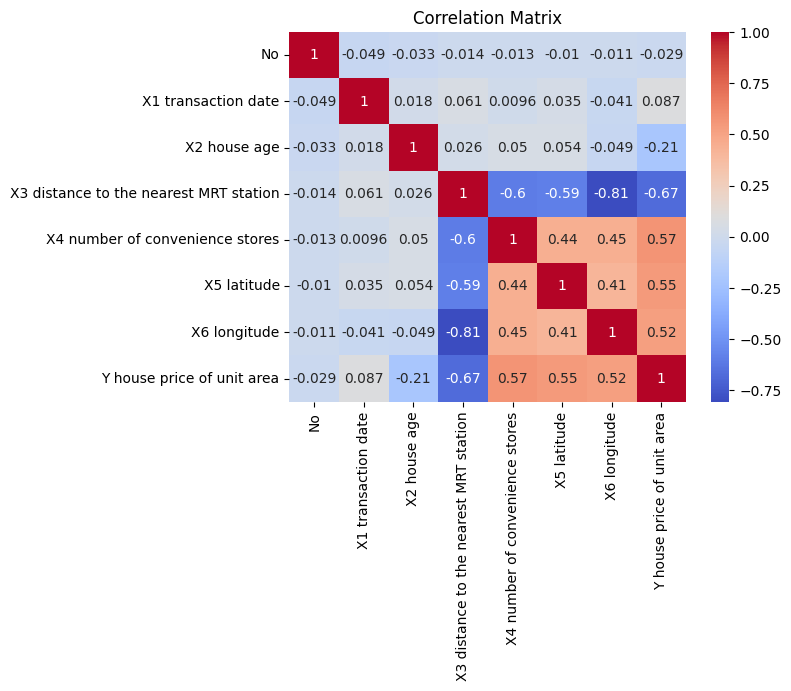

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

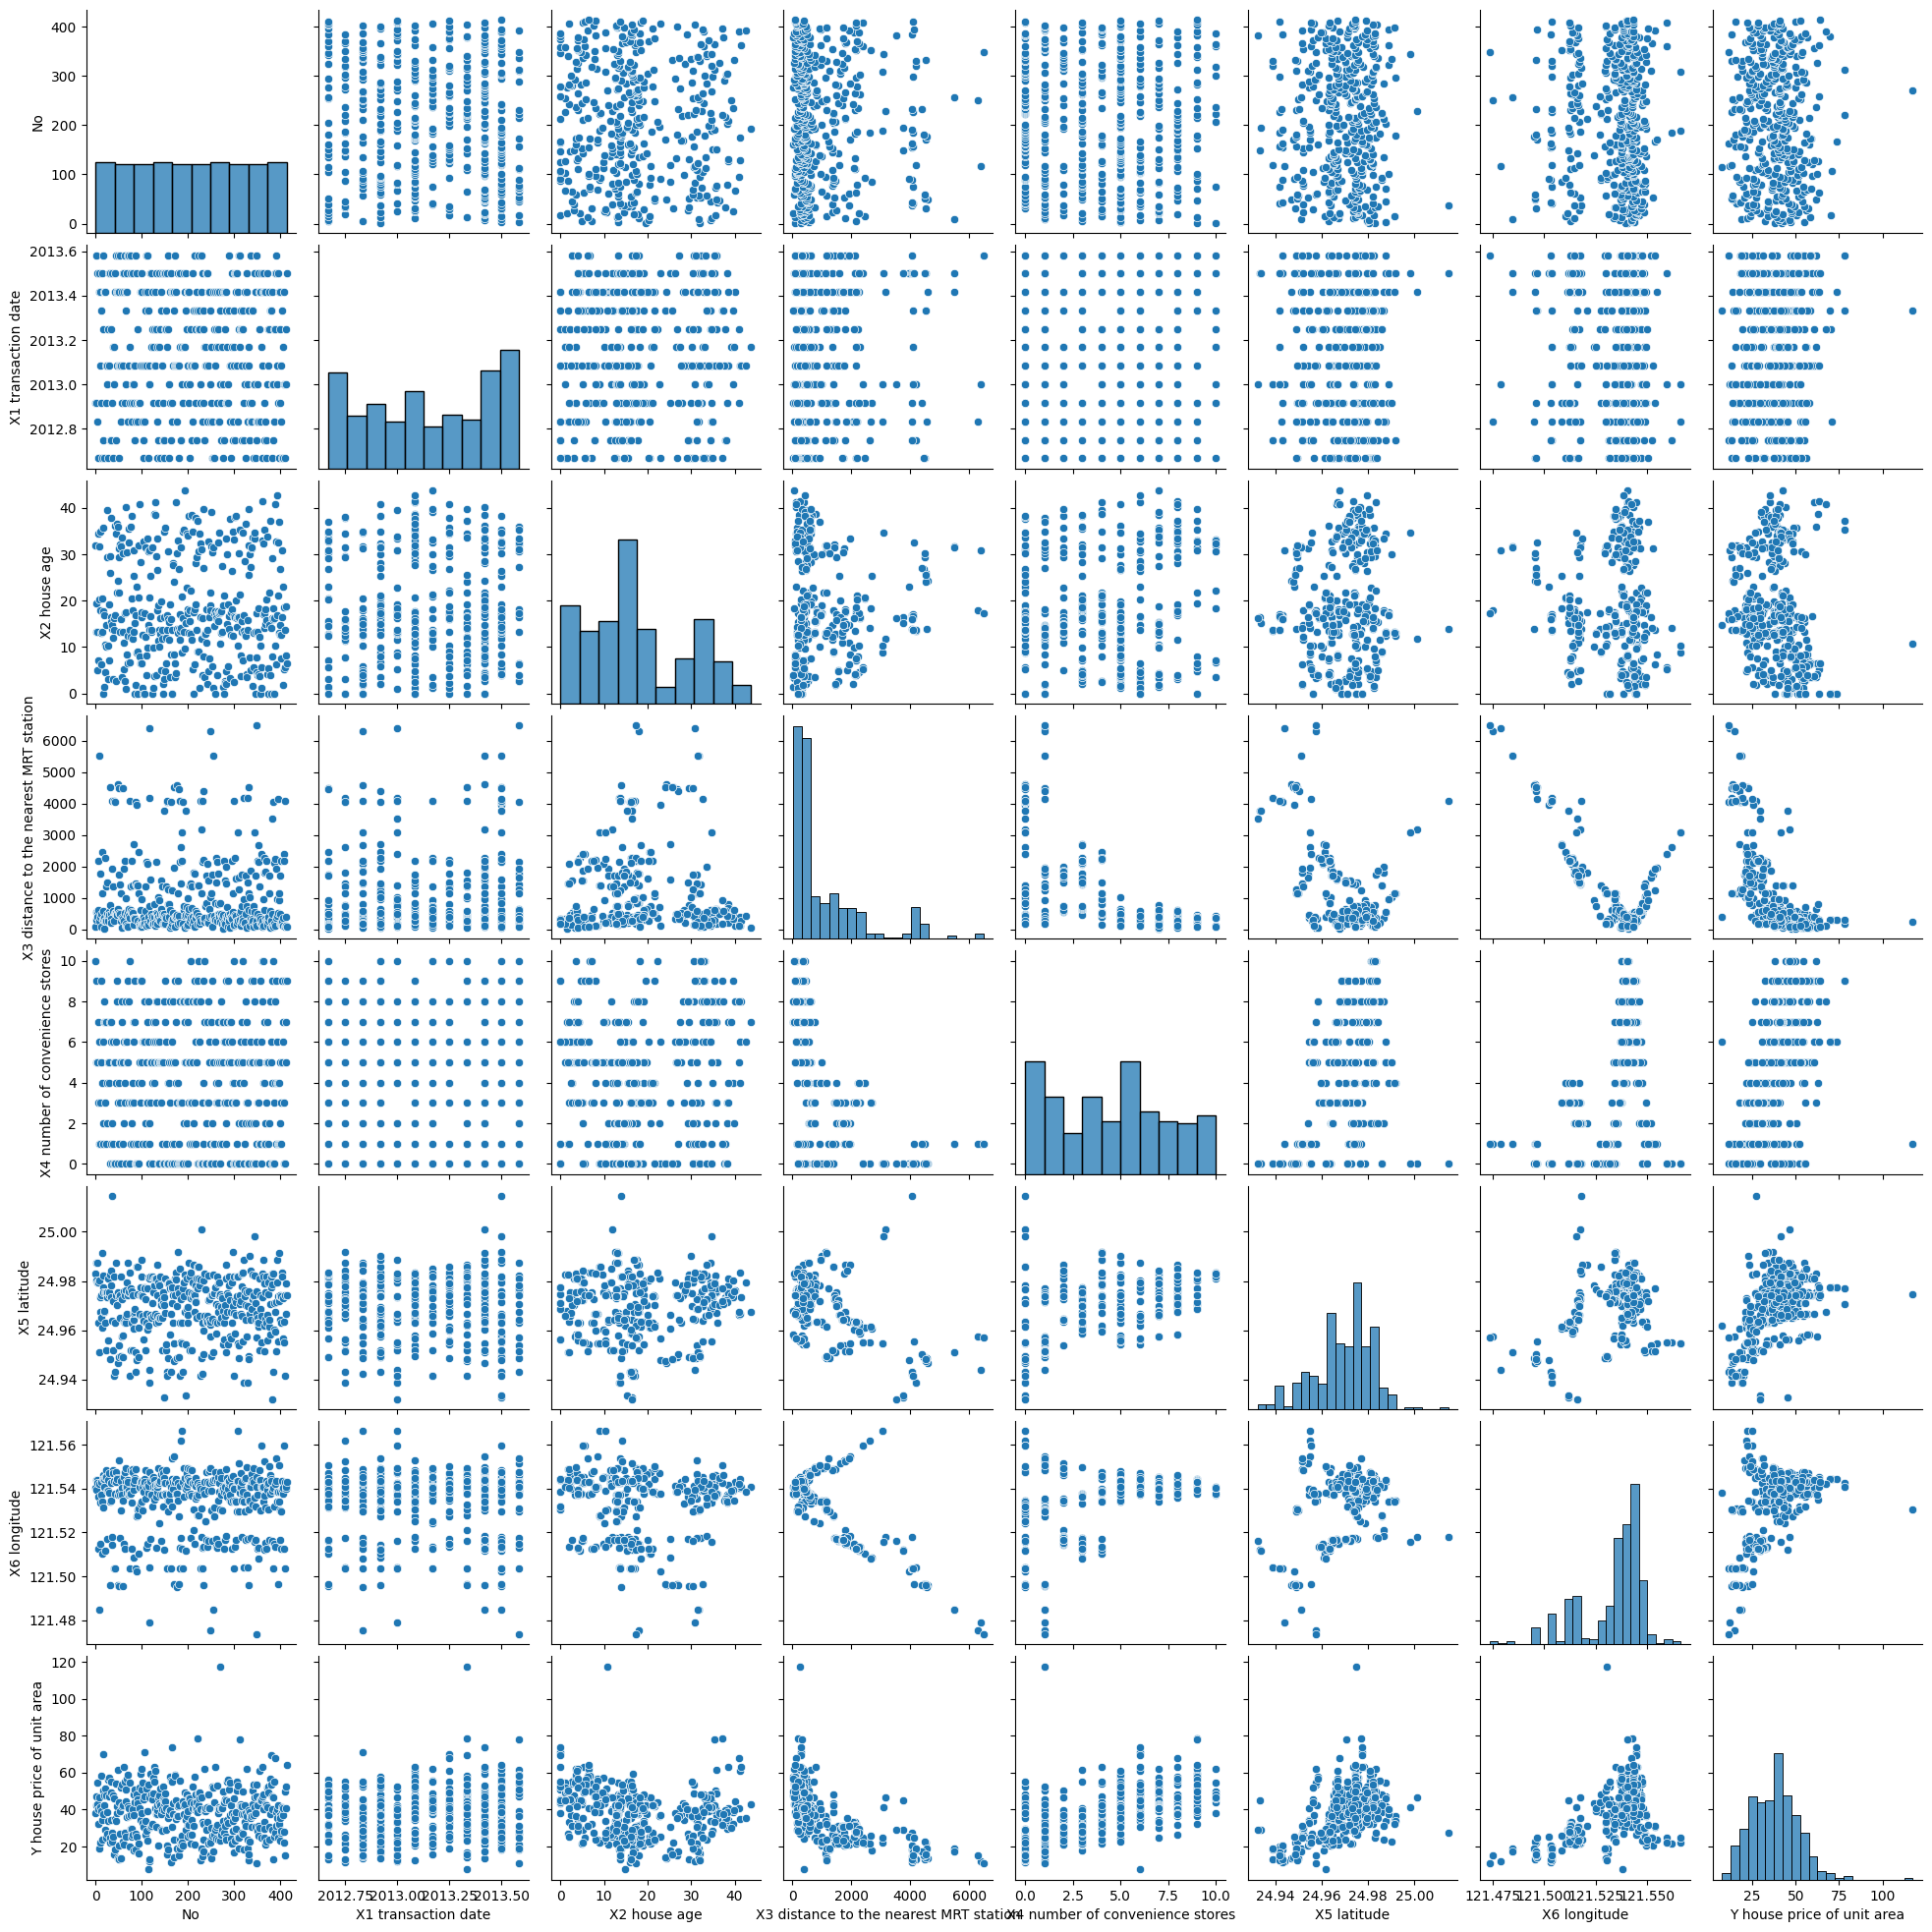

In [ ]:
# Pairplot
sns.pairplot(data)
plt.show()

In [ ]:
# Separate features and target variable
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Fit and transform X_train
X_train_poly = poly.fit_transform(X_train)

# Transform X_test
X_test_poly = poly.transform(X_test)

In [ ]:
# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the polynomial features
model.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 41.99310666542855


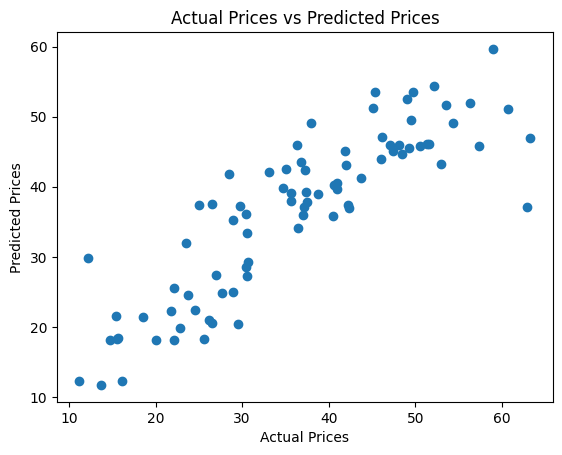

In [ ]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instantiate Lasso regression model
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength

# Fit the model on training data
lasso.fit(X_train_poly, y_train)

# Predict on testing data
y_pred = lasso.predict(X_test_poly)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get the coefficients
coefficients = lasso.coef_


Mean Squared Error: 42.33780880831138


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+04, tolerance: 6.226e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.metrics import r2_score

# Predict on training data
y_train_pred = lasso.predict(X_train_poly)

# Calculate R2 score for training data
r2_train = r2_score(y_train, y_train_pred)
print("R2 score for training data:", r2_train)

# Calculate R2 score for testing data
r2_test = r2_score(y_test, y_pred)
print("R2 score for testing data:", r2_test)


R2 score for training data: 0.6650923225575424
R2 score for testing data: 0.7476283185254795


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Retrieve feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

In [ ]:
X_train_poly_data = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_data = pd.DataFrame(X_test_poly, columns=poly_feature_names)

In [ ]:
train_data_poly = pd.concat([X_train_poly_data, y_train.reset_index(drop=True)], axis=1)

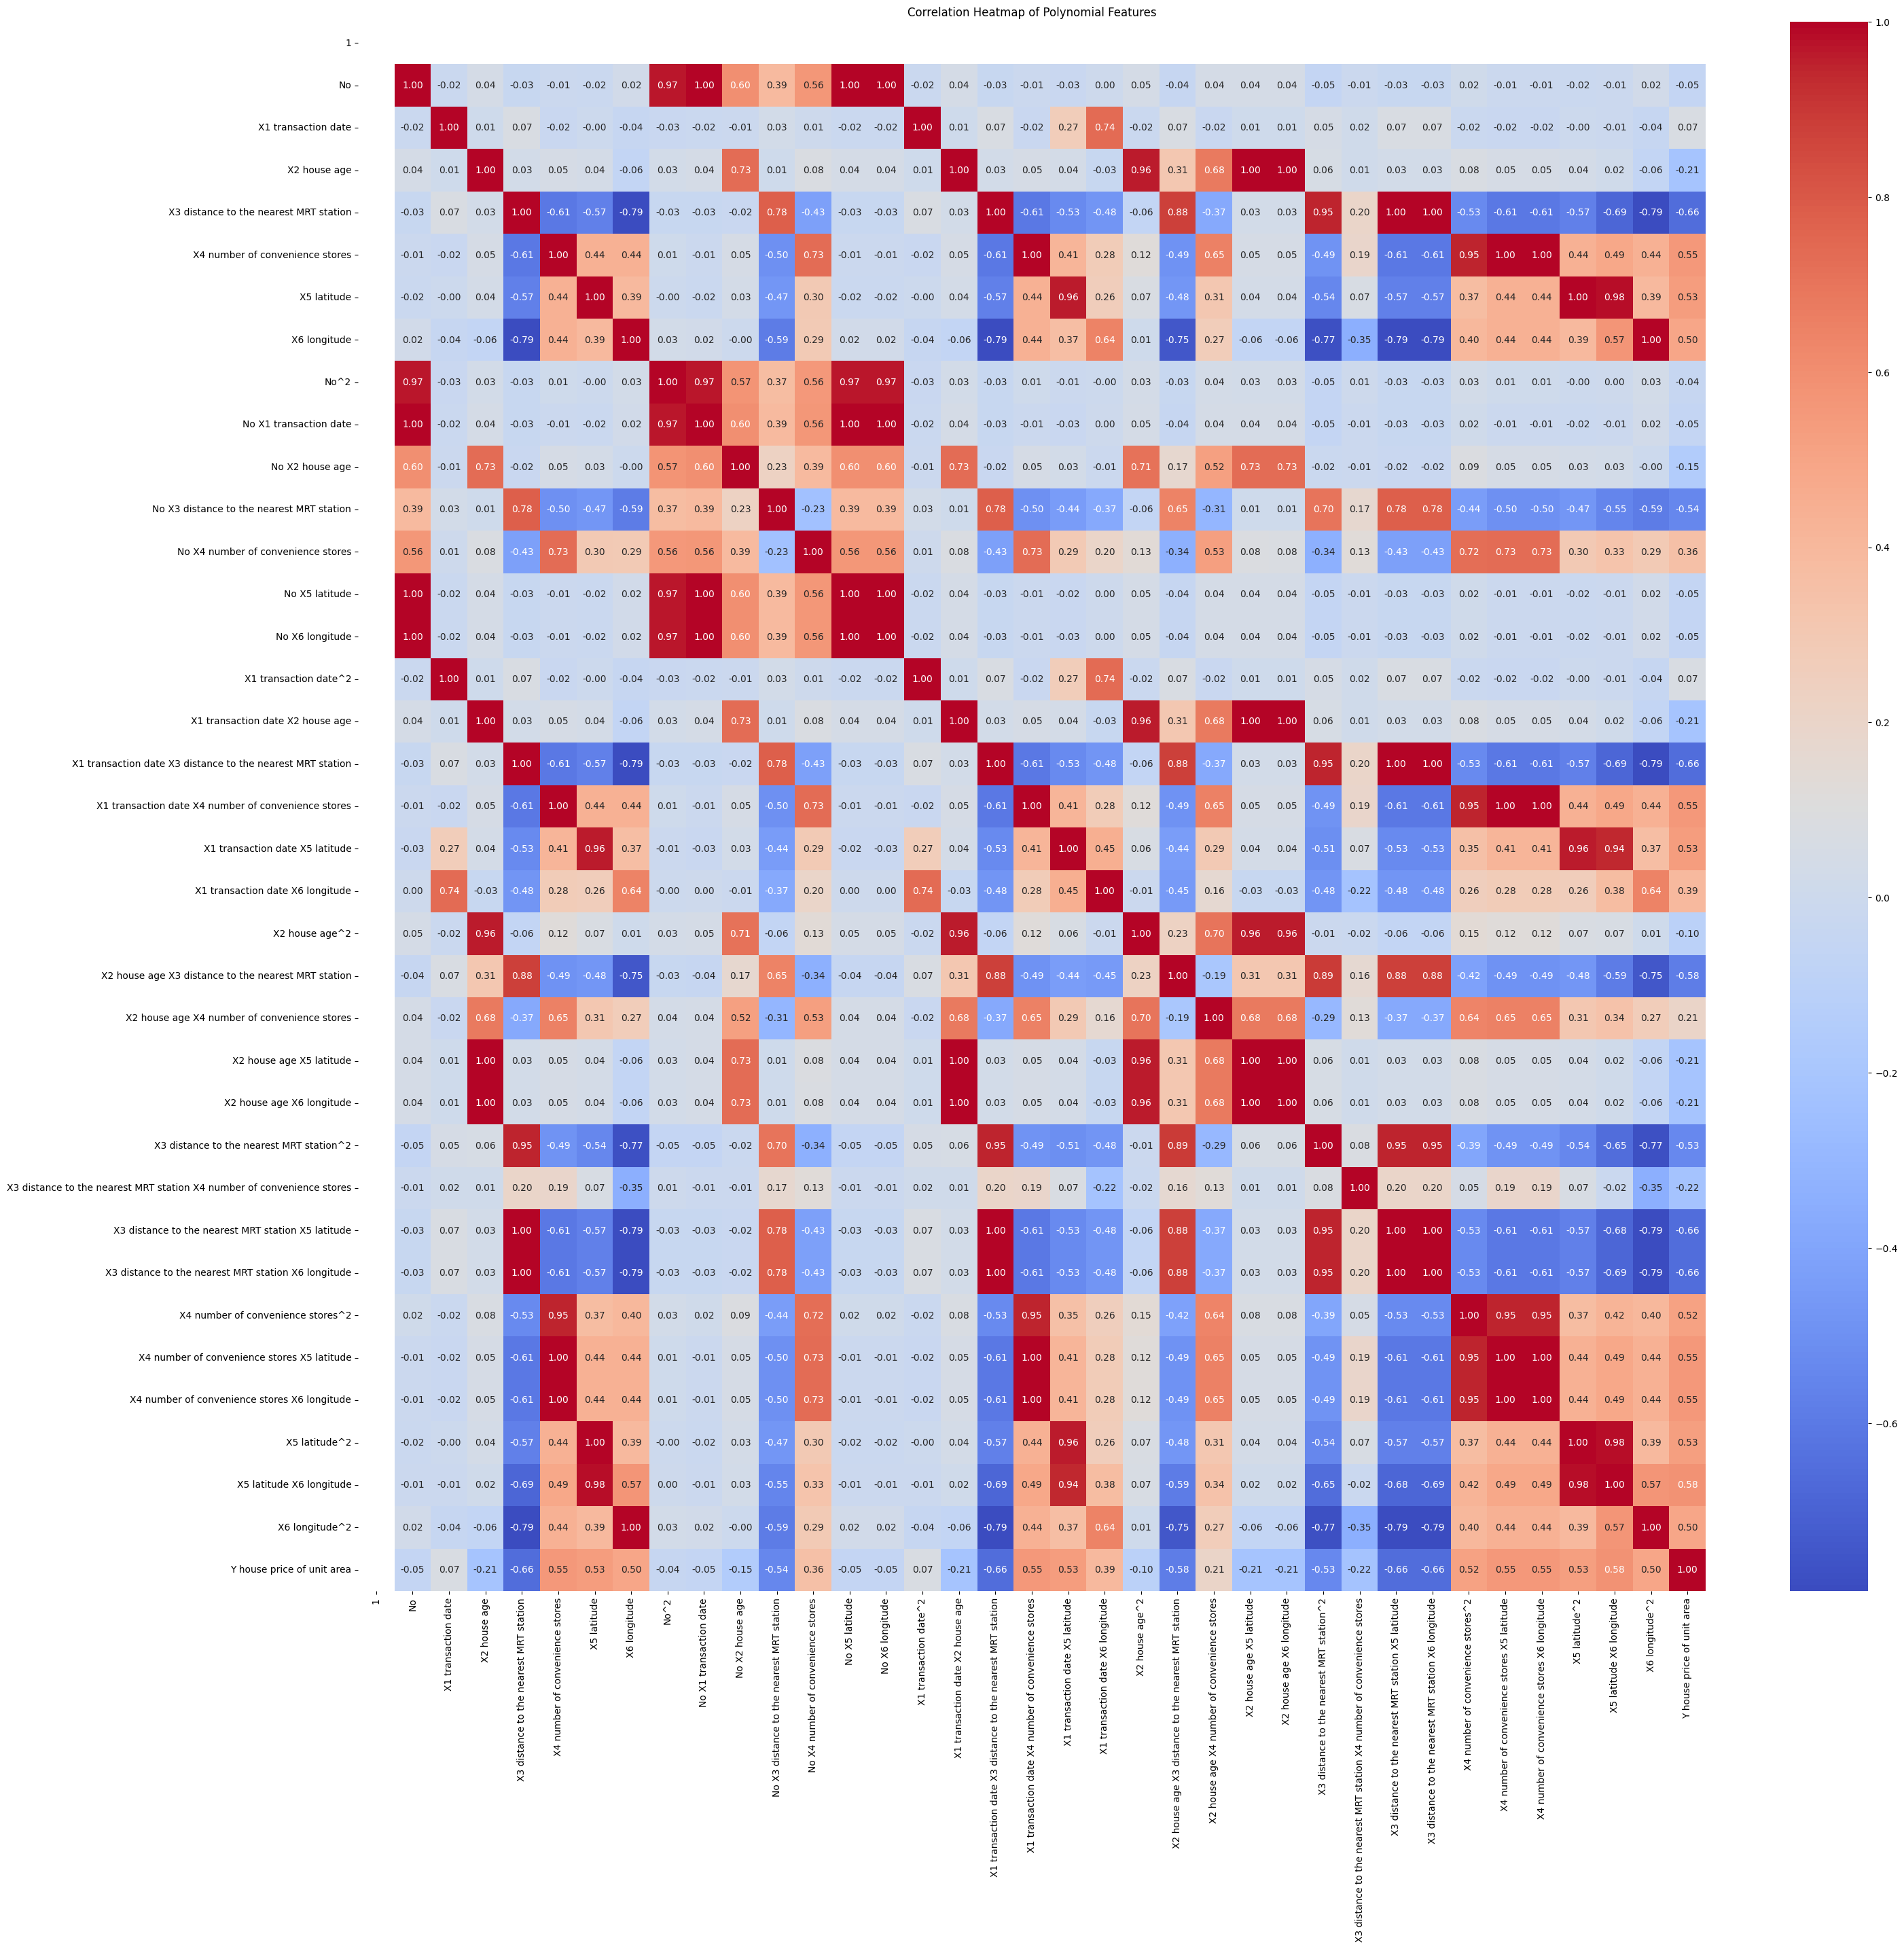

In [ ]:
# Visualize relationships between target variable and polynomial features
plt.figure(figsize=(32, 30))
corr = train_data_poly.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Polynomial Features')
plt.show()

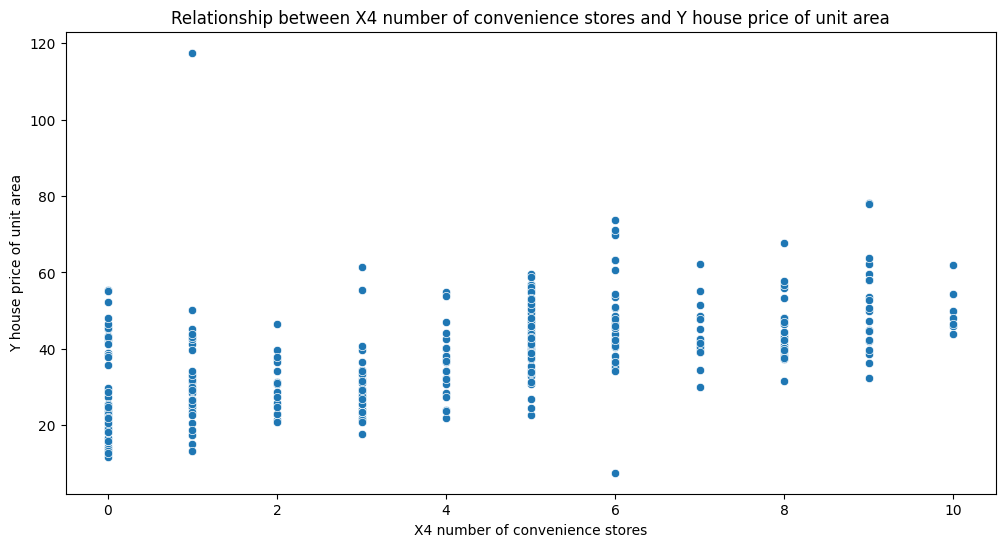

In [ ]:
# Visualize relationship between target variable and specific polynomial features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='X4 number of convenience stores', y='Y house price of unit area', data=train_data_poly)
plt.title('Relationship between X4 number of convenience stores and Y house price of unit area')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')
plt.show()